In [4]:
%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import boxcox, yeojohnson
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, \
    RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor, DistanceMetric

import warnings
warnings.filterwarnings("ignore")

## Нормализация данных

Задача: определить, как влияют на эффективность kNN регрессии разные методы нормализации на датасете Бостон. Список методов нормализации, которые необходимо протестировать: 
- Минимакс
- Z-нормализация
- Устойчивая нормализация
- Квантильное преобразование к нормальному распределению
- Преобразование Бокс-Кокс

Для каждого метода нормализации нужно подобрать параметр k и метрику.

In [ ]:
# фиксируем перестановку элементов в датасете

shuffle = np.array([2, 354, 154,  18, 114, 100, 113, 490, 299, 117,  44, 462, 115,
       166, 485, 180, 339, 356, 465, 325, 139, 303, 442, 281, 157, 469,
       424, 311, 319,  11, 189,  90, 201,  69, 364, 336,  83, 498, 270,
       254,  20, 381, 426, 481, 432, 263, 152, 412, 219, 289, 425, 482,
        79, 130, 206,  66, 267, 366, 346, 133, 395,   9, 459, 388, 182,
       376, 149, 486, 269, 192, 294, 280, 144, 202,  52, 141,  89, 467,
        99, 417, 227,   1,  26, 301,  56, 178,  42, 345, 288, 489, 186,
        37, 105, 305, 408, 438, 324, 127, 132,  76, 377, 436, 329, 477,
       125, 239, 378,  48, 235, 198,  50, 326, 323, 441,   0, 316, 383,
       313, 175, 277, 155,  57, 472, 210,  22,   3, 111, 172, 304, 298,
       484, 211,  86, 196,  30, 310, 392, 480, 495,  17, 228, 275, 217,
       391, 271,  34, 403, 162, 452, 430, 145, 435, 161, 169, 385, 427,
       478, 138, 394, 273,  53, 209, 348, 236, 398, 419, 349, 400, 120,
       231, 183,  94,  28, 302, 181, 290, 179, 171,  32, 284,  81, 119,
       268, 445, 112, 504,   5, 287, 167,  21,  64, 315,  95, 177,  31,
       220, 174, 216,  73, 494, 422, 380, 492, 232, 300, 221, 264, 460,
       451, 222,  16, 488, 358, 208, 390, 362, 108, 109, 151, 331, 248,
       255, 173,  67,  97, 370, 165, 384, 496, 393, 103, 476, 214, 292,
       205, 153, 353, 468, 332,  24, 321, 158, 286, 455, 306, 134,  40,
        12, 184, 278, 146, 104, 297, 194, 453,  29, 491,  74, 470,  61,
       447, 253, 285, 337, 312, 363, 335, 464, 215, 373, 249, 237, 446,
        46, 123, 140, 487, 230, 434, 143,  84, 342, 317, 429,  82,  60,
       136,  88, 293,  96, 170, 415, 156, 502, 257,  71, 203, 246, 266,
       307, 200, 218, 260, 190, 164, 148, 473,  19, 431, 418, 251,  87,
       256, 343, 379,  70, 168, 365,  65, 497, 503,  33,  41, 483,  59,
       501, 129, 233,   4, 116,   8, 258, 224, 493, 448, 176, 282, 126,
       135, 160, 428,  91, 295, 471, 322, 443, 387, 382,   7, 449, 262,
       474, 355,  45, 318, 389,  98, 243, 357, 276, 118, 137, 347,  77,
       226,  68, 499, 191,  75, 397, 439, 461, 199, 213, 437, 475, 454,
       252,  49, 150, 466, 241, 340,  80,  92, 261,  62,  55, 456, 375,
       369, 291, 404, 420, 405, 212, 374, 223, 421, 245,  85, 238, 121,
       440, 309, 163,  78, 350,  23, 396, 402, 450, 229,  15, 131,  27,
       272, 147, 423, 359, 204, 259, 413, 410,  25, 265, 247, 338, 411,
       274,  10, 344, 416,  14,  13, 187, 195, 414, 279, 244, 314, 444,
       458,  36, 234, 330, 386, 371, 106, 360, 124, 334, 328, 407,  93,
       351, 128, 185, 107, 242, 188, 102, 320, 197,  47, 433, 327,  63,
       110, 479, 341, 361, 368, 225, 308, 463,  54, 240, 296, 457, 193,
       142,  43, 207, 406, 283,  35, 122,  72, 367, 159,  38, 399,  39,
        58, 500, 352, 372,  51, 333, 505,   6, 401, 409, 250, 101])

In [ ]:
boston = datasets.load_boston()
boston = pd.DataFrame(
    data=np.c_[boston['data'], boston['target']],
    columns=list(boston['feature_names']) + ['target']
    )

boston = boston.iloc[shuffle, :]

boston_test_size = 200
train_boston = boston.iloc[:-boston_test_size, :]
test_boston = boston.iloc[-boston_test_size:, :]

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2
154,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0
18,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69,20.2
114,0.14231,0.0,10.01,0.0,0.547,6.254,84.2,2.2565,6.0,432.0,17.8,388.74,10.45,18.5


In [ ]:
# найдем признаки, которые содержат нулевые значения в тренировочной и тестовой выборках

train_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,3.104888,11.008170,11.123399,0.075163,0.553970,6.286951,68.650654,3.761455,9.000000,402.029412,18.311765,360.056111,12.827222,22.372876
std,7.468376,23.234636,6.991814,0.264087,0.116426,0.678298,27.859837,2.051579,8.453925,165.958189,2.190514,84.965627,7.112298,8.690908
min,0.006320,0.000000,0.740000,0.000000,0.385000,4.368000,6.000000,1.174200,1.000000,187.000000,12.600000,3.650000,1.730000,5.000000
25%,0.079165,0.000000,5.145000,0.000000,0.454250,5.885500,43.375000,2.113700,4.000000,277.000000,16.800000,376.602500,7.250000,17.200000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.171500,77.500000,3.167500,5.000000,329.000000,18.600000,392.080000,11.705000,21.150000
75%,2.588992,9.375000,18.100000,0.000000,0.621500,6.628000,93.750000,4.941025,8.000000,608.750000,20.200000,396.780000,16.635000,24.950000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.770000,50.000000


In [ ]:
test_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,4.391736,11.907500,11.157250,0.060000,0.555804,6.281090,68.459000,3.846432,10.390000,417.735000,18.67550,351.499450,12.386600,22.777500
std,10.062882,23.504147,6.671525,0.238083,0.115316,0.740002,28.655337,2.190163,9.038049,172.394064,2.11174,100.209613,7.194537,9.939331
min,0.013010,0.000000,0.460000,0.000000,0.394000,3.561000,2.900000,1.129600,1.000000,188.000000,12.60000,0.320000,2.880000,5.000000
25%,0.087962,0.000000,5.190000,0.000000,0.448000,5.887000,45.600000,2.009600,4.000000,283.250000,17.60000,374.650000,6.727500,16.575000
50%,0.246510,0.000000,9.690000,0.000000,0.535000,6.229000,77.250000,3.275900,5.000000,336.000000,19.20000,390.825000,10.390000,21.300000
75%,4.652375,20.000000,18.100000,0.000000,0.647000,6.600750,94.400000,5.404800,24.000000,666.000000,20.20000,395.710000,17.320000,26.600000
max,73.534100,95.000000,25.650000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,666.000000,22.00000,396.900000,37.970000,50.000000


In [ ]:
features = list(boston.columns.drop('target'))
target_var = 'target'

In [ ]:
S = np.cov(train_boston.T)

mahalanobis = DistanceMetric.get_metric('mahalanobis', V=S)

def my_mahalanobis(x, y):
    if x.ndim == 1:
        x = x.reshape((1, -1))
    if y.ndim == 1:
        y = y.reshape((1, -1))
    d = mahalanobis.pairwise(x, y)
    return d[0, 0]

In [ ]:
def scaler(X_train, y_train, X_test, y_test):

  scalers = MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer(), PowerTransformer('box-cox')
  scalers_name = [
      'Минимакс(MinMaxScaler)',
      'Z-нормализация(StandardScaler)',
      'Устойчивая нормализация(RobustScaler)',
      'Квантильное преобразование(QuantileTransformer)',
      'Преобразование Бокс-Кокс(PowerTransformer)'
      ]
  n = 0
  
  while n < len(scalers_name):
      for scaler in scalers:
        if scalers_name[n] == 'Преобразование Бокс-Кокс(PowerTransformer)':
          
          # для Преобразования Бокс-Кокс к нулевым значениям добавим константу
          X_train['ZN'].loc[X_train['ZN'] == 0] = 0.01
          X_train['CHAS'].loc[X_train['CHAS'] == 0] = 0.01
          X_test['ZN'].loc[X_test['ZN'] == 0] = 0.01
          X_test['CHAS'].loc[X_test['CHAS'] == 0] = 0.01
          
        scaled_train = scaler.fit_transform(X_train, y_train)
        scaled_train = np.concatenate([scaled_train, y_train.to_numpy()], axis=1)
        scaled_test = scaler.transform(X_test)

        metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', my_mahalanobis]
        kvalues = list(range(1, 50))
        cv = 6

        knn_model = KNeighborsRegressor()

        gs_search = GridSearchCV(
                    knn_model,
                    param_grid={'n_neighbors': kvalues, 'metric': metrics},
                    cv=cv
        )
        gs_search.fit(scaled_train, y_train)

        knn_model = knn_model.set_params(**gs_search.best_params_)
        knn_model.fit(scaled_train[:, :-1], scaled_train[:, -1:])

        best_parameters = gs_search.best_params_
        
        print('Scaler:', scalers_name[n])
        print('best_parameters:', best_parameters)
        print('r2_score:', round(knn_model.score(scaled_test, y_test), 2))
        print()
        n += 1

In [ ]:
scaler(train_boston[features], train_boston[[target_var]], test_boston[features], test_boston[[target_var]])

Scaler: Минимакс(MinMaxScaler)
best_parameters: {'metric': 'euclidean', 'n_neighbors': 5}
r2_score: 0.63

Scaler: Z-нормализация(StandardScaler)
best_parameters: {'metric': 'chebyshev', 'n_neighbors': 5}
r2_score: 0.65

Scaler: Устойчивая нормализация(RobustScaler)
best_parameters: {'metric': 'euclidean', 'n_neighbors': 2}
r2_score: 0.67

Scaler: Квантильное преобразование(QuantileTransformer)
best_parameters: {'metric': 'euclidean', 'n_neighbors': 4}
r2_score: 0.62

Scaler: Преобразование Бокс-Кокс(PowerTransformer)
best_parameters: {'metric': 'chebyshev', 'n_neighbors': 7}
r2_score: 0.59



## Признаковое пространство

1. Отсортируйте признаки в датасете Бостон по убыванию корреляции с целевой переменной. 

2. Увеличивайте  набор признаков для обучения от 1 до 13, добавляя новые признаки в порядке убывания их корреляции с целевой переменной.

3. На каждом наборе признаков обучите kNN, не забывайте при этом подбирать лучшие значения k.

4. Постройте графики зависимости **RMSE** на кросс-валидации и тестовой выборке от количества задействованных признаков. Для кросс-валидации укажите погрешности определения метрик.

Остальные параметры, такие как метрика расстояния, нормализация остаются на Ваше усмотрение.

In [ ]:
boston_2 = datasets.load_boston()
boston_2 = pd.DataFrame(
    data=np.c_[boston_2['data'], boston_2['target']],
    columns=list(boston_2['feature_names']) + ['target']
)

boston_2 = boston_2.iloc[shuffle, :]

boston_test_size = 200
train_boston_2 = boston_2.iloc[:-boston_test_size, :]
test_boston_2 = boston_2.iloc[-boston_test_size:, :]

train_boston_2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2
154,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0
18,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69,20.2
114,0.14231,0.0,10.01,0.0,0.547,6.254,84.2,2.2565,6.0,432.0,17.8,388.74,10.45,18.5


In [ ]:
# Отсортируйте признаки в датасете Бостон по убыванию корреляции с целевой переменной

corr_matrix = boston_2.corr() # создаем корреляционную матрицу
corr_matrix = corr_matrix['target'] # выделяем последний столбец с целевой переменной
corr_matrix # выводим значения корреляции

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
target     1.000000
Name: target, dtype: float64

In [ ]:
order = corr_matrix.abs().sort_values(ascending = False) # сортируем корреляцию по абсолютным значениям
order = corr_matrix[order.index] # выводим данные в новом порядке
order

target     1.000000
LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: target, dtype: float64

In [ ]:
new_features = order.index.drop('target') # удаляем из признаков саму целевую переменную
new_features = list(new_features) # сохраняем новый порядок признаков в список
target_var = 'target'
new_features

['LSTAT',
 'RM',
 'PTRATIO',
 'INDUS',
 'TAX',
 'NOX',
 'CRIM',
 'RAD',
 'AGE',
 'ZN',
 'B',
 'DIS',
 'CHAS']

In [ ]:
# определим признаки и целевую переменную для тренировочной и тестовой выборок

X_train_2 = train_boston_2[new_features]
y_train_2 = train_boston_2[[target_var]]
X_test_2 = test_boston_2[new_features]
y_test_2 = test_boston_2[[target_var]]

X_train_2.head()

,LSTAT,RM,PTRATIO,INDUS,TAX,NOX,CRIM,RAD,AGE,ZN,B,DIS,CHAS
2,4.03,7.185,17.8,7.07,242.0,0.469,0.02729,2.0,61.1,0.0,392.83,4.9671,0.0
354,8.05,5.663,22.0,1.91,334.0,0.413,0.04301,4.0,21.9,80.0,382.80,10.5857,0.0
154,15.12,6.129,14.7,19.58,403.0,0.871,1.41385,5.0,96.0,0.0,321.02,1.7494,1.0
18,11.69,5.456,21.0,8.14,307.0,0.538,0.80271,4.0,36.6,0.0,288.99,3.7965,0.0
114,10.45,6.254,17.8,10.01,432.0,0.547,0.14231,6.0,84.2,0.0,388.74,2.2565,0.0


In [ ]:
# применим z-нормализацию

scaler_std = StandardScaler()
scaled_train_2 = scaler_std.fit_transform(X_train_2, y_train_2)
scaled_train_2 = np.concatenate([scaled_train_2, y_train_2.to_numpy()], axis=1)
scaled_test_2 = scaler_std.transform(X_test_2)

scaled_train_2

array([[-1.23892896,  1.32614361, -0.23401033, ...,  0.58862948,
        -0.28508259, 34.7       ],
       [-0.67278498, -0.92138468,  1.68648824, ...,  3.33178633,
        -0.28508259, 18.2       ],
       [ 0.32289611, -0.23324527, -1.65152118, ..., -0.98234119,
         3.50775538, 17.        ],
       ...,
       [-1.0882389 ,  0.98059721, -1.4228904 , ...,  1.32717171,
        -0.28508259, 37.        ],
       [-0.16719869, -0.63933612, -1.65152118, ..., -0.65395915,
        -0.28508259, 22.7       ],
       [ 2.18187635, -1.62576772, -1.65152118, ..., -1.08965366,
        -0.28508259, 17.8       ]])

In [ ]:
# Увеличивайте набор признаков для обучения от 1 до 13, добавляя новые признаки в порядке убывания их корреляции с целевой переменной
# На каждом наборе признаков обучите kNN, не забывайте при этом подбирать лучшие значения k

model = KNeighborsRegressor()
metrics = ['euclidean', 'manhattan', 'chebyshev']
kvalues = list(range(1, 31))
cv = 6
i = 1
q_feat = np.arange(1, 14) # количество признаков

RMSE_train_list = []
RMSE_test_list = []
scores_std_list = []

while i <= len(new_features):
  for q in q_feat:
  
    gs = GridSearchCV(model, param_grid={'n_neighbors': kvalues, 'metric': metrics}, cv=cv, scoring='neg_root_mean_squared_error')
    gs.fit(scaled_train_2[:, :i], y_train_2)

    model = model.set_params(**gs.best_params_)
    model.fit(scaled_train_2[:, :i], scaled_train_2[:, -1:])
    y_pred_train = model.predict(scaled_train_2[:, :i])
    y_pred_test = model.predict(scaled_test_2[:, :i])

    RMSE_train = mean_squared_error(y_pred_train, y_train_2, squared=False)
    RMSE_test = mean_squared_error(y_pred_test, y_test_2, squared=False)

    best_parameters = gs.best_params_

    scores_std = gs.cv_results_['std_test_score']

    RMSE_train_list.append(RMSE_train)
    RMSE_test_list.append(RMSE_test)
    scores_std_list.append(scores_std)

    print('Количество признаков:', q)
    print('best_parameters:', best_parameters)
    print('r2_score:', round(model.score(scaled_test_2[:, :i], y_test_2.to_numpy()), 2))
    print()
    i += 1

Количество признаков: 1
best_parameters: {'metric': 'euclidean', 'n_neighbors': 23}
r2_score: 0.66

Количество признаков: 2
best_parameters: {'metric': 'manhattan', 'n_neighbors': 12}
r2_score: 0.71

Количество признаков: 3
best_parameters: {'metric': 'chebyshev', 'n_neighbors': 6}
r2_score: 0.71

Количество признаков: 4
best_parameters: {'metric': 'manhattan', 'n_neighbors': 4}
r2_score: 0.73

Количество признаков: 5
best_parameters: {'metric': 'euclidean', 'n_neighbors': 2}
r2_score: 0.74

Количество признаков: 6
best_parameters: {'metric': 'manhattan', 'n_neighbors': 2}
r2_score: 0.74

Количество признаков: 7
best_parameters: {'metric': 'manhattan', 'n_neighbors': 2}
r2_score: 0.73

Количество признаков: 8
best_parameters: {'metric': 'manhattan', 'n_neighbors': 2}
r2_score: 0.73

Количество признаков: 9
best_parameters: {'metric': 'manhattan', 'n_neighbors': 2}
r2_score: 0.69

Количество признаков: 10
best_parameters: {'metric': 'manhattan', 'n_neighbors': 3}
r2_score: 0.7

Количест

In [ ]:
# значения RMSE на трейне и на тесте

print('RMSE_train_list', RMSE_train_list)
print('RMSE_test_list', RMSE_test_list)

RMSE_train_list [4.652123625014699, 3.59285922858885, 3.2847368520726032, 2.8777888576388517, 2.006097730564282, 2.212857924964554, 2.1840628926279226, 2.152861373034332, 2.208230667239852, 2.6207900154363557, 2.1080998475689574, 2.002649388975364, 2.2088410441156547]
RMSE_test_list [5.819101798962781, 5.299101404431174, 5.335601991444931, 5.118595693644889, 5.030985241481036, 5.065211002515098, 5.147326976208136, 5.136808347602623, 5.517834720250327, 5.4321389280221215, 5.374315072639489, 5.369296974465092, 5.5402166022638495]


In [ ]:
# Для кросс-валидации укажите погрешности определения метрик
# 90 значений для каждого из фолдов (30 n_neighbors * 3 metrics)

for num, score in enumerate(scores_std_list, 1):
  print('Количество признаков: ' + str(num), 'std_test_score:', score, ' ', sep='\n')

Количество признаков: 1
std_test_score:
[0.40342636 0.22230855 0.2546547  0.28275113 0.23560428 0.28682994
 0.26329525 0.27977237 0.27034015 0.28817061 0.29489543 0.25135511
 0.23872399 0.28368325 0.31850309 0.34497675 0.32802124 0.33080849
 0.35444613 0.34208734 0.33587649 0.31544906 0.30944362 0.32205332
 0.3191214  0.33763236 0.32678206 0.31154027 0.30604237 0.31477084
 0.40342636 0.22230855 0.2546547  0.28275113 0.23560428 0.28682994
 0.26329525 0.27977237 0.27034015 0.28817061 0.29489543 0.25135511
 0.23872399 0.28368325 0.31850309 0.34497675 0.32802124 0.33080849
 0.35444613 0.34208734 0.33587649 0.31544906 0.30944362 0.32205332
 0.3191214  0.33763236 0.32678206 0.31154027 0.30604237 0.31477084
 0.40342636 0.22230855 0.2546547  0.28275113 0.23560428 0.28682994
 0.26329525 0.27977237 0.27034015 0.28817061 0.29489543 0.25135511
 0.23872399 0.28368325 0.31850309 0.34497675 0.32802124 0.33080849
 0.35444613 0.34208734 0.33587649 0.31544906 0.30944362 0.32205332
 0.3191214  0.33763236

In [ ]:
# посчитаем "размер" погрешности для каждого набора признаков как среднее на всех фолдах

score_list = []
for score in scores_std_list:
  mean_score = np.mean(score)
  score_list.append(mean_score)
print(score_list)

[0.30244553185975864, 0.4153326819228175, 0.3221568130530462, 0.4239570798895694, 0.5111702328101446, 0.5215426783837346, 0.532068295171678, 0.5395310265106613, 0.5792493269077638, 0.5472573335776703, 0.4927451393109801, 0.472314478844741, 0.5630206128310556]


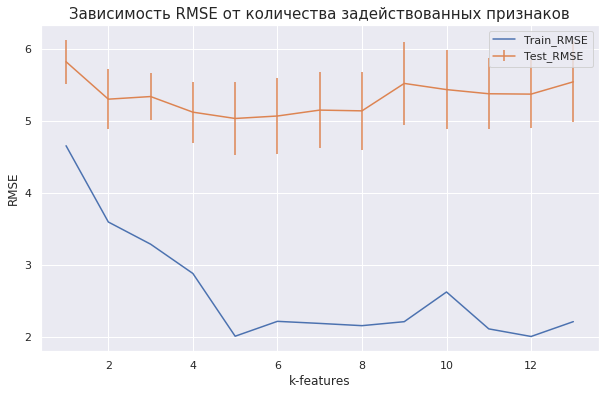

In [ ]:
# добавим размеры погрешнойстей на график

plt.figure(figsize=(10,6))
plt.errorbar(x=q_feat, y=RMSE_train_list, label = 'Train_RMSE')
plt.errorbar(x=q_feat, y=RMSE_test_list, yerr=score_list, label = 'Test_RMSE')
plt.xlabel('k-features')
plt.ylabel('RMSE')
plt.legend()
plt.title('Зависимость RMSE от количества задействованных признаков', fontsize=15)
plt.show()